In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import scipy.stats as stats
import statistics
import statsmodels.api  as api
import numpy as np

In [2]:
dataset = pd.read_json('datasetTpm02.json',orient='split')

In [3]:
dataset =dataset.set_axis(['preco','portas','arCondicionado','quadrimestre','idadeLocatario','quilometragem'],axis=1,copy=False)

In [4]:
dataset.shape

(20, 6)

<Axes: >

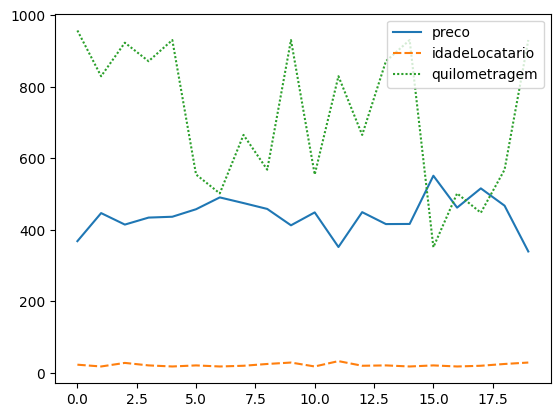

In [5]:
sns.lineplot(dataset)

#Pelo boxplot do Preço, você consegue visualizar algum outlier?  

<Axes: >

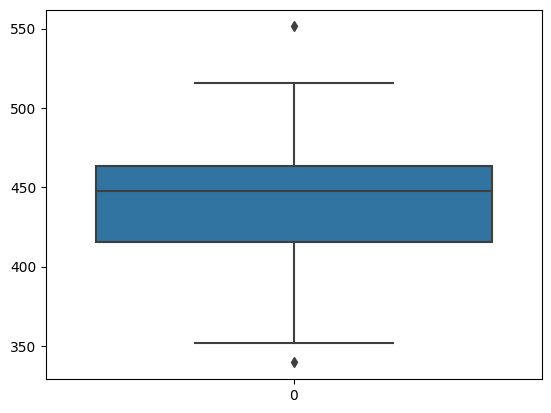

In [6]:
sns.boxplot(data=dataset['preco'])#quilometragem


<Axes: >

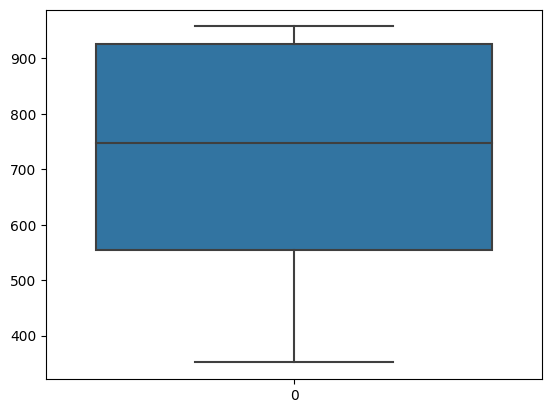

In [7]:
sns.boxplot(data=dataset['quilometragem'])

<Axes: >

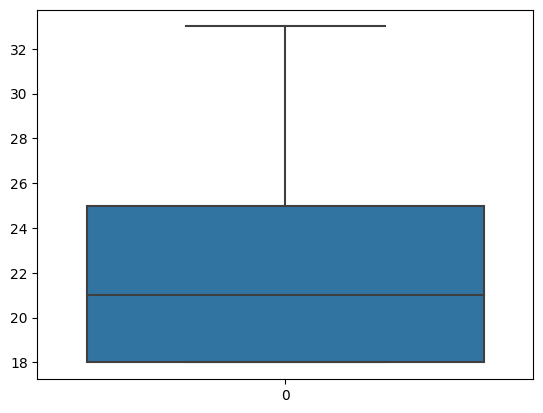

In [8]:
sns.boxplot(data=dataset['idadeLocatario'])

<Axes: xlabel='idadeLocatario', ylabel='Count'>

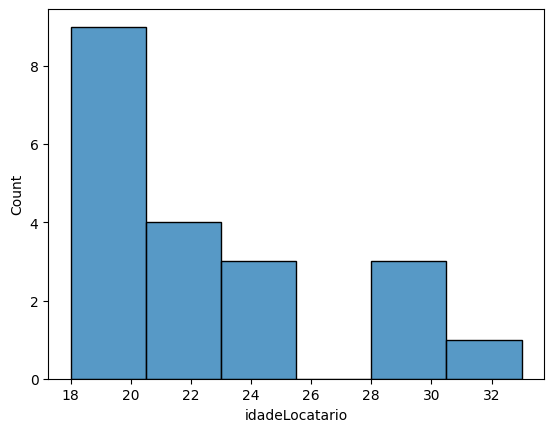

In [9]:
sns.histplot(dataset['idadeLocatario'])

In [10]:
normalizacao = MinMaxScaler(feature_range=(0,1)) #normaliza os valores entre 0 e 1
padronizacao = StandardScaler()

In [11]:
dataset_np = dataset.to_numpy()

In [12]:
dataset_np[:,0]


array([368.3845148906, 446.8501868258, 414.7276569198, 434.2910909182,
       436.6526865353, 457.6579734425, 490.6943465976, 474.8817813999,
       458.4623958972, 412.7194126733, 448.7990321124, 352.0407472359,
       449.4618582211, 416.1509539271, 416.4994267503, 551.3158033318,
       462.1267894712, 515.9573353955, 467.598697163, 339.5484703694],
      dtype=object)

In [13]:
dataset_normalizado = normalizacao.fit_transform(dataset[['preco','idadeLocatario','quilometragem']])

In [14]:
dataset_padronizado = padronizacao.fit_transform(dataset[['preco','idadeLocatario','quilometragem']])

In [15]:
dataset_normalizado

array([[0.13616852, 0.33333333, 1.        ],
       [0.50669626, 0.        , 0.78889186],
       [0.35500842, 0.66666667, 0.94364943],
       [0.44739016, 0.2       , 0.85818735],
       [0.458542  , 0.        , 0.95586917],
       [0.5577324 , 0.2       , 0.33528803],
       [0.71373556, 0.        , 0.24821753],
       [0.63906604, 0.13333333, 0.51805611],
       [0.56153102, 0.46666667, 0.35764188],
       [0.34552516, 0.73333333, 0.95586917],
       [0.51589903, 0.        , 0.33528803],
       [0.05899058, 1.        , 0.78889186],
       [0.519029  , 0.13333333, 0.51805611],
       [0.36172946, 0.2       , 0.85818735],
       [0.36337501, 0.        , 0.95586917],
       [1.        , 0.2       , 0.        ],
       [0.57883488, 0.        , 0.24821753],
       [0.83303153, 0.13333333, 0.1589793 ],
       [0.60467413, 0.46666667, 0.35764188],
       [0.        , 0.73333333, 0.95586917]])

In [16]:
dataset_padronizado

array([[-1.45356832,  0.18228958,  1.2243228 ],
       [ 0.1227261 , -0.9570203 ,  0.56676348],
       [-0.52258239,  1.32159946,  1.04880213],
       [-0.12957319, -0.27343437,  0.78260498],
       [-0.08213117, -0.9570203 ,  1.08686417],
       [ 0.33984338, -0.27343437, -0.84612105],
       [ 1.00351004, -0.9570203 , -1.11732811],
       [ 0.68585192, -0.50129635, -0.27683533],
       [ 0.3560034 ,  0.63801353, -0.77649332],
       [-0.56292595,  1.54946143,  1.08686417],
       [ 0.16187639, -0.9570203 , -0.84612105],
       [-1.78189775,  2.46090934,  0.56676348],
       [ 0.17519188, -0.50129635, -0.27683533],
       [-0.49398983, -0.27343437,  0.78260498],
       [-0.48698937, -0.9570203 ,  1.08686417],
       [ 2.22133258, -0.27343437, -1.89047572],
       [ 0.42961729, -0.9570203 , -1.11732811],
       [ 1.51101743, -0.50129635, -1.39528721],
       [ 0.53954227,  0.63801353, -0.77649332],
       [-2.03285471,  1.54946143,  1.08686417]])

<Axes: >

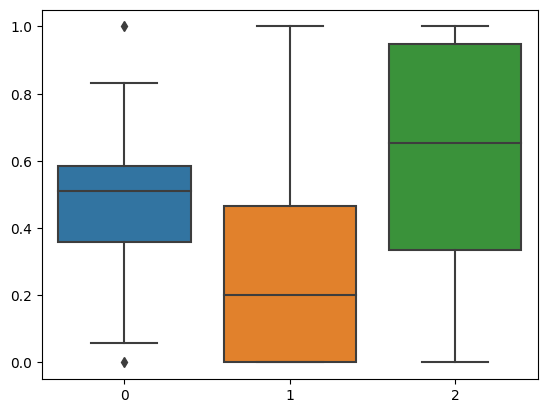

In [17]:
sns.boxplot(data=dataset_normalizado)

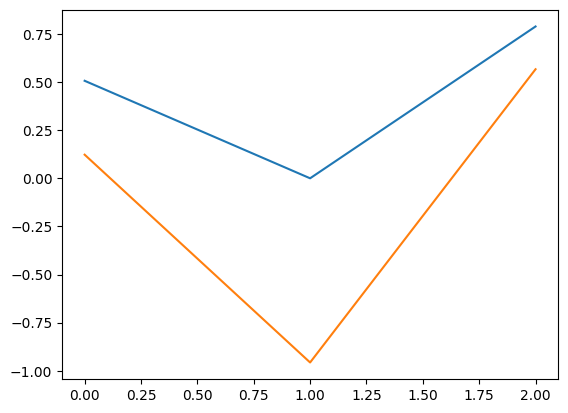

In [18]:
plt.plot(dataset_normalizado[1])
plt.plot(dataset_padronizado[1])

plt.show()


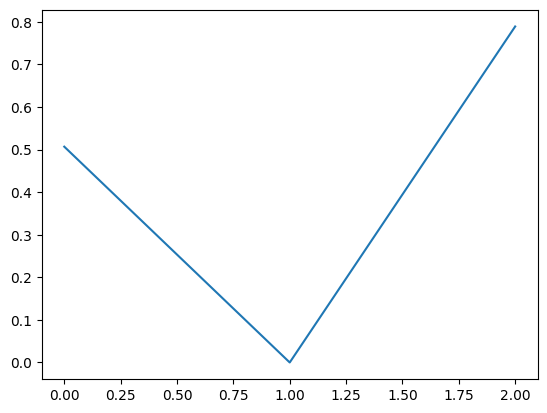

In [19]:
plt.plot(dataset_normalizado[1])

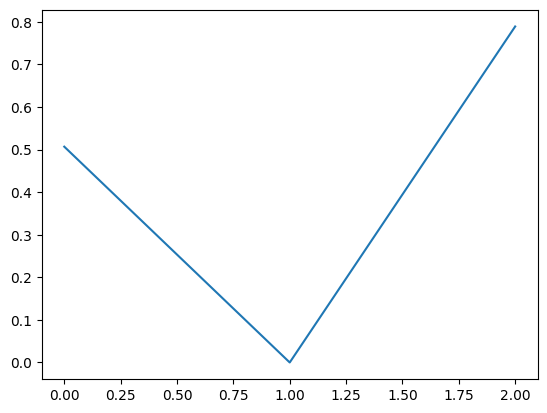

In [20]:
plt.plot(dataset_normalizado[1])

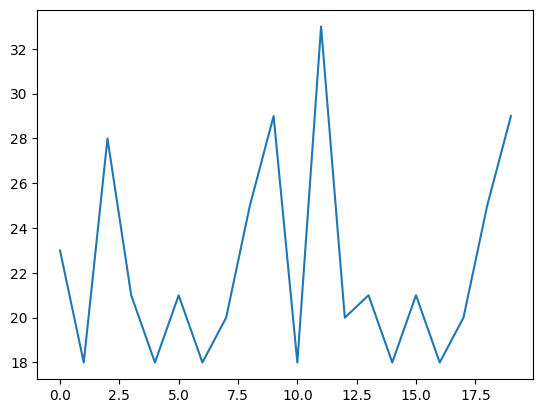

In [21]:
plt.plot(dataset['idadeLocatario'])

#Pelo histograma, você diria que a variável Preço segue uma distribuição normal?

(array([2., 1., 0., 4., 2., 6., 2., 1., 1., 1.]),
 array([339.54847037, 360.72520367, 381.90193696, 403.07867026,
        424.25540355, 445.43213685, 466.60887015, 487.78560344,
        508.96233674, 530.13907004, 551.31580333]),
 <BarContainer object of 10 artists>)

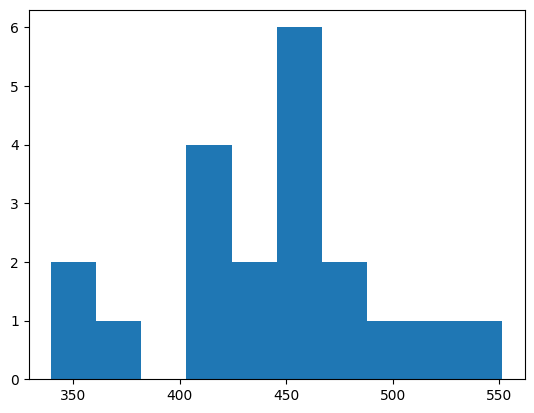

In [22]:
plt.hist(dataset['preco'])

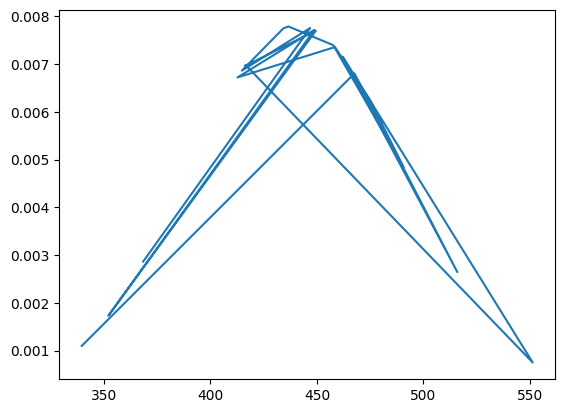

In [23]:
media = dataset['preco'].mean()
desvioPadrao = dataset['preco'].std()


plt.plot(dataset['preco'], stats.norm.pdf(dataset['preco'], media, desvioPadrao))
plt.show()

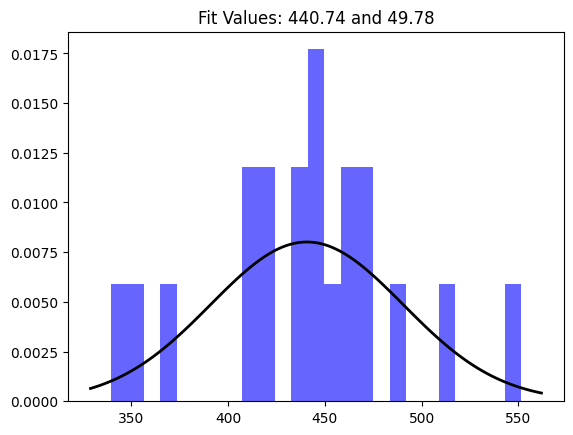

In [24]:
data = dataset['preco']
mu, std = stats.norm.fit(data) 
  
# Plot the histogram.
plt.hist(data, bins=25, density=True, alpha=0.6, color='b')
  
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
  
plt.plot(x, p, 'k', linewidth=2)
title = "Fit Values: {:.2f} and {:.2f}".format(mu, std)
plt.title(title)
  
plt.show()

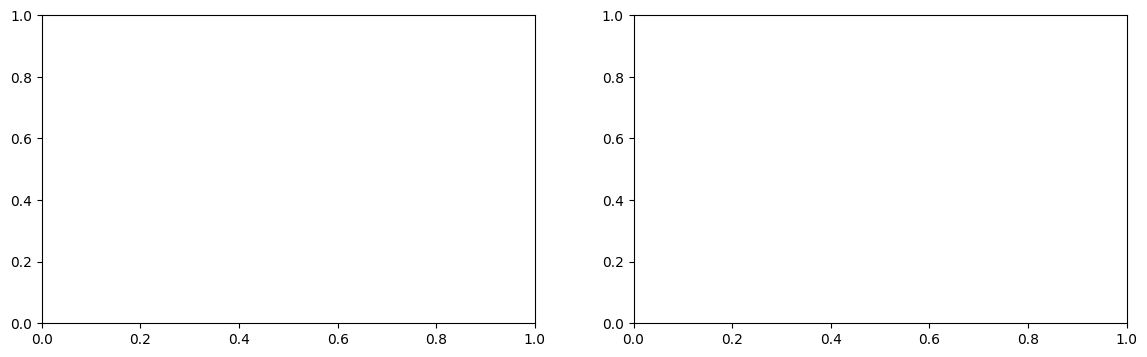

In [25]:
fig, ax = plt.subplots(figsize = (14,4), ncols=2);

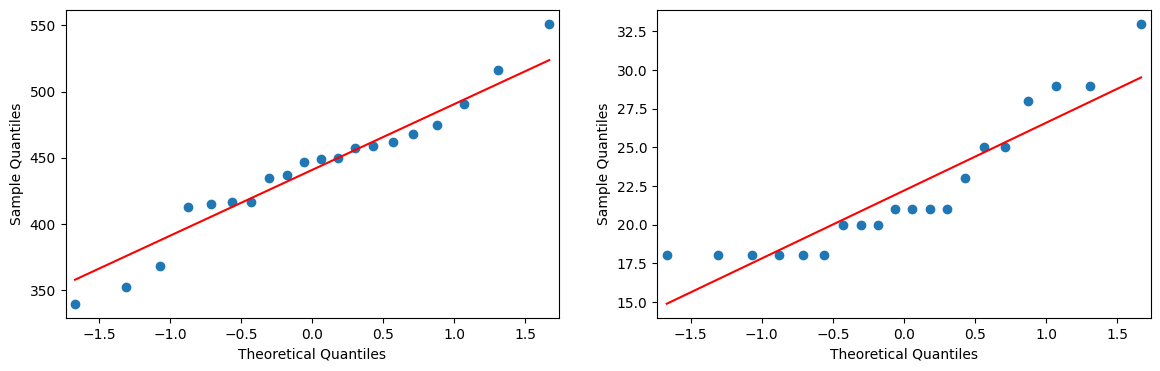

In [26]:
api.qqplot(dataset['preco'], line='s',ax = ax[0])
api.qqplot(dataset['idadeLocatario'], line='s',ax = ax[1])

In [27]:
valor_shapiro, p_valor_shapiro = stats.shapiro(dataset['preco'])

In [28]:
p_valor_shapiro, valor_shapiro

(0.660359263420105, 0.9655889272689819)

In [29]:
print("Com 95% de significancia é provavel que seja uma distribuição ")

Com 95% de significancia é provavel que seja uma distribuição 


#Qual é o valor mediano do Preço e qual a sua interpretação CORRETA? A mediana é 447,8. Isso nos diz que o preço médio é 447,8

In [30]:
dataset['preco'].median()

447.8246094691

#Através do boxplot, como o Preço se comporta em relação a cada Quadrimestre? 

In [31]:
dataset


,preco,portas,arCondicionado,quadrimestre,idadeLocatario,quilometragem
0,368.384515,duas_portas,sem_ar_condicionado,segundo_quadrimestre,23,957.442781
1,446.850187,quatro_portas,com_ar_condicionado,segundo_quadrimestre,18,829.533278
2,414.727657,duas_portas,com_ar_condicionado,segundo_quadrimestre,28,923.300216
3,434.291091,quatro_portas,com_ar_condicionado,segundo_quadrimestre,21,871.519117
4,436.652687,quatro_portas,com_ar_condicionado,segundo_quadrimestre,18,930.704106
5,457.657973,duas_portas,com_ar_condicionado,terceiro_quadrimestre,21,554.696696
6,490.694347,quatro_portas,com_ar_condicionado,primeiro_quadrimestre,18,501.941060
7,474.881781,duas_portas,com_ar_condicionado,primeiro_quadrimestre,20,665.435075
8,458.462396,quatro_portas,com_ar_condicionado,terceiro_quadrimestre,25,568.240795
9,412.719413,duas_portas,com_ar_condicionado,segundo_quadrimestre,29,930.704106


In [32]:
dataset.groupby('quadrimestre')[['preco','idadeLocatario']].describe()

preco                                                 \
                      count        mean        std         min         25%   
quadrimestre                                                                 
primeiro_quadrimestre   5.0  500.089593  34.114779  467.598697  474.881781   
segundo_quadrimestre   10.0  403.786515  37.173242  339.548470  379.468239   
terceiro_quadrimestre   5.0  455.301610   5.884563  448.799032  449.461858   

                                                          idadeLocatario  \
                              50%         75%         max          count   
quadrimestre                                                               
primeiro_quadrimestre  490.694347  515.957335  551.315803            5.0   
segundo_quadrimestre   415.439305  429.843175  446.850187           10.0   
terceiro_quadrimestre  457.657973  458.462396  462.126789            5.0   

                                                                       
                       mean       std   min    25%   50%    75%   max  
quadrimestre                                                           
primeiro_quadrimestre  20.8  2.588436  18.0  20.00  20.0  21.00  25.0  
segundo_quadrimestre   23.8  5.513620  18.0  18.75  22.0  28.75  33.0  
terceiro_quadrimestre  20.4  2.880972  18.0  18.00  20.0  21.00  25.0

In [33]:
dataset.groupby('quadrimestre')[['preco']].describe()

preco                                                 \
                      count        mean        std         min         25%   
quadrimestre                                                                 
primeiro_quadrimestre   5.0  500.089593  34.114779  467.598697  474.881781   
segundo_quadrimestre   10.0  403.786515  37.173242  339.548470  379.468239   
terceiro_quadrimestre   5.0  455.301610   5.884563  448.799032  449.461858   

                                                           
                              50%         75%         max  
quadrimestre                                               
primeiro_quadrimestre  490.694347  515.957335  551.315803  
segundo_quadrimestre   415.439305  429.843175  446.850187  
terceiro_quadrimestre  457.657973  458.462396  462.126789

In [34]:
dataset.groupby('quadrimestre').get_group('primeiro_quadrimestre')

,preco,portas,arCondicionado,quadrimestre,idadeLocatario,quilometragem
6,490.694347,quatro_portas,com_ar_condicionado,primeiro_quadrimestre,18,501.941060
7,474.881781,duas_portas,com_ar_condicionado,primeiro_quadrimestre,20,665.435075
15,551.315803,quatro_portas,com_ar_condicionado,primeiro_quadrimestre,21,351.547138
17,515.957335,duas_portas,com_ar_condicionado,primeiro_quadrimestre,20,447.872006
18,467.598697,quatro_portas,com_ar_condicionado,primeiro_quadrimestre,25,568.240795


In [35]:
dsPrimQuadrimestre = dataset.groupby('quadrimestre').get_group('primeiro_quadrimestre')
dsSegQuadrimestre  = dataset.groupby('quadrimestre').get_group('segundo_quadrimestre')
dsTercQuadrimestre = dataset.groupby('quadrimestre').get_group('terceiro_quadrimestre')

In [36]:
dsPrimQuadrimestre['preco'].median(), dsSegQuadrimestre['preco'].median(), dsTercQuadrimestre['preco'].median()

(490.6943465976, 415.43930542345, 457.6579734425)

<Axes: >

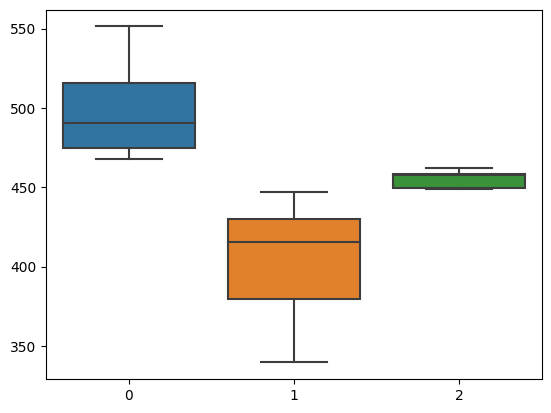

In [37]:
sns.boxplot(data= [dsPrimQuadrimestre['preco'].to_numpy(),dsSegQuadrimestre['preco'].to_numpy(),dsTercQuadrimestre['preco'].to_numpy()])

Explore a relação entre as variáveis Preço e Quadrimestre, e responda: 

Através de uma ANOVA, existe diferença significativa entre o Preço médio de pelo menos um Quadrimestre em relação aos outros? Como chegou a essa conclusão? Adote 95% de confiança na sua interpretação. 

In [38]:
dsPrimQuadrimestre

,preco,portas,arCondicionado,quadrimestre,idadeLocatario,quilometragem
6,490.694347,quatro_portas,com_ar_condicionado,primeiro_quadrimestre,18,501.941060
7,474.881781,duas_portas,com_ar_condicionado,primeiro_quadrimestre,20,665.435075
15,551.315803,quatro_portas,com_ar_condicionado,primeiro_quadrimestre,21,351.547138
17,515.957335,duas_portas,com_ar_condicionado,primeiro_quadrimestre,20,447.872006
18,467.598697,quatro_portas,com_ar_condicionado,primeiro_quadrimestre,25,568.240795


In [39]:
dsSegQuadrimestre

,preco,portas,arCondicionado,quadrimestre,idadeLocatario,quilometragem
0,368.384515,duas_portas,sem_ar_condicionado,segundo_quadrimestre,23,957.442781
1,446.850187,quatro_portas,com_ar_condicionado,segundo_quadrimestre,18,829.533278
2,414.727657,duas_portas,com_ar_condicionado,segundo_quadrimestre,28,923.300216
3,434.291091,quatro_portas,com_ar_condicionado,segundo_quadrimestre,21,871.519117
4,436.652687,quatro_portas,com_ar_condicionado,segundo_quadrimestre,18,930.704106
9,412.719413,duas_portas,com_ar_condicionado,segundo_quadrimestre,29,930.704106
11,352.040747,quatro_portas,sem_ar_condicionado,segundo_quadrimestre,33,829.533278
13,416.150954,quatro_portas,com_ar_condicionado,segundo_quadrimestre,21,871.519117
14,416.499427,duas_portas,com_ar_condicionado,segundo_quadrimestre,18,930.704106
19,339.548470,quatro_portas,sem_ar_condicionado,segundo_quadrimestre,29,930.704106


In [40]:
dsTercQuadrimestre

,preco,portas,arCondicionado,quadrimestre,idadeLocatario,quilometragem
5,457.657973,duas_portas,com_ar_condicionado,terceiro_quadrimestre,21,554.696696
8,458.462396,quatro_portas,com_ar_condicionado,terceiro_quadrimestre,25,568.240795
10,448.799032,quatro_portas,com_ar_condicionado,terceiro_quadrimestre,18,554.696696
12,449.461858,duas_portas,com_ar_condicionado,terceiro_quadrimestre,20,665.435075
16,462.126789,quatro_portas,com_ar_condicionado,terceiro_quadrimestre,18,501.941060


In [41]:
estatistica_f_anova, p_valor = stats.f_oneway(dsPrimQuadrimestre['preco'], dsSegQuadrimestre['preco'], dsTercQuadrimestre['preco'])
nivel_confianca = 5/100 #5%

In [42]:
estatistica_f_anova, p_valor

(15.947666981933578, 0.0001259049454086884)

In [43]:
if p_valor < nivel_confianca:
    print("Aceitamos a hipotese alternativa H1")
else:
    printprint("Rejeitamos a hipotese nula H1")

Aceitamos a hipotese alternativa H1


Explore a relação entre as variáveis Preço e Portas, e responda: 

Através de um teste t de Student para amostras independentes, existe diferença significativa 
entre o preço médio do aluguel do veículo com duas portas quando comparado com o preço médio do veículo de quatro portas?
Adote 95% de confiança ao realizar na sua interpretação. 

In [44]:
dsDuasportas = dataset[dataset['portas']=='duas_portas']
dsQuatroportas = dataset[dataset['portas']=='quatro_portas']

In [45]:
# como o p_valor é maior que o nivel de significancia de 5% podemos dizer que com o nivvel de confiança de 95% 
# a distribuição é normal e portanto podemos seguir com o teste t de student, a estatistica
# t foi utilizada haja vista que temos um numero de elementos da amostra, pequeno ou seja menor que 30
# seguin

stats.shapiro(dsDuasportas['preco']) 

ShapiroResult(statistic=0.9697156548500061, pvalue=0.8957673907279968)

In [46]:
stats.t(amostra,grauLiberdade) # t de student

NameError: name 'amostra' is not defined

Explore a relação entre as variáveis Preço e Quilometragem, e responda: 

Pelo gráfico de dispersão, você identifica que existe relação linear entre o Preço e a Quilometragem? Se sim, a relação é positiva ou negativa

In [47]:
# podemos ver que p_valor é menor que 0.05 (5%) isso nos faz rejeitar a h0
#ou seja o coeficiente de Pearson é diferente de 0, logo existe uma relação entre as variaveis seja ela negativa ou positiva
#no caso concreto aqui  é negativa

coefientePerason,p_valor = stats.pearsonr(dataset['preco'], dataset['quilometragem']) 

In [48]:
coefientePerason,p_valor

(-0.8231560872163203, 8.292529055805023e-06)

In [49]:
dataset[['preco','idadeLocatario','quilometragem']].corr()

,preco,idadeLocatario,quilometragem
preco,1.000000,-0.580478,-0.823156
idadeLocatario,-0.580478,1.000000,0.350214
quilometragem,-0.823156,0.350214,1.000000


In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [73]:
#variveis independentes
variavelIndepedente = dataset.quilometragem.values.reshape(-1,1)
print(variavelIndepedente)


[[957.44278054]
 [829.53327822]
 [923.30021583]
 [871.51911691]
 [930.70410568]
 [554.69669591]
 [501.94105978]
 [665.43507482]
 [568.24079543]
 [930.70410568]
 [554.69669591]
 [829.53327822]
 [665.43507482]
 [871.51911691]
 [930.70410568]
 [351.54713822]
 [501.94105978]
 [447.87200619]
 [568.24079543]
 [930.70410568]]


In [74]:
#variavel dependente f(x)
variavelDependente = dataset.preco.to_numpy()
variavelDependente

array([368.38451489, 446.85018683, 414.72765692, 434.29109092,
       436.65268654, 457.65797344, 490.6943466 , 474.8817814 ,
       458.4623959 , 412.71941267, 448.79903211, 352.04074724,
       449.46185822, 416.15095393, 416.49942675, 551.31580333,
       462.12678947, 515.9573354 , 467.59869716, 339.54847037])

In [53]:
modeloLinear = LinearRegression()

In [75]:
aux = modeloLinear.fit(variavelIndepedente, variavelDependente)

In [76]:
aux.intercept_ #intecpto coeficiente linar

592.2568884210286

In [83]:
aux.coef_ #ccoefiente angulat

array([-0.21064768])

<Axes: >

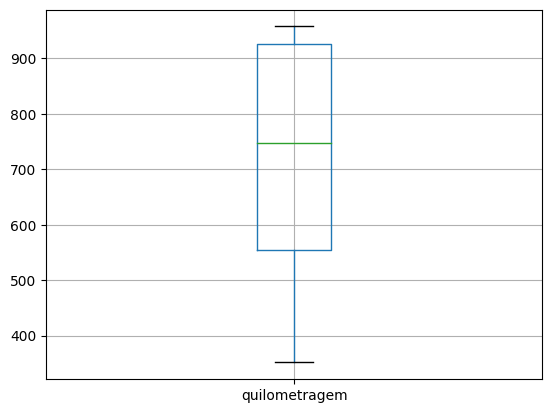

In [91]:
dataset.boxplot(['quilometragem'])

Explore a variável Quilometragem e responda: 

Qual é o valor do coeficiente de variação e qual a sua interpretação CORRETA? 

In [94]:
coefienteVariacao = stats.variation(dataset.quilometragem)
coefienteVariacao

0.2704372717404603